In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [36]:
df = pd.read_csv("input/train.csv")
df.head(3)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5


In [7]:
# 欠損値
df.isnull().any(axis=0)

id                       False
allelectrons_Total       False
density_Total            False
allelectrons_Average     False
val_e_Average            False
atomicweight_Average     False
ionenergy_Average        False
el_neg_chi_Average       False
R_vdw_element_Average    False
R_cov_element_Average    False
zaratio_Average          False
density_Average          False
Hardness                 False
dtype: bool

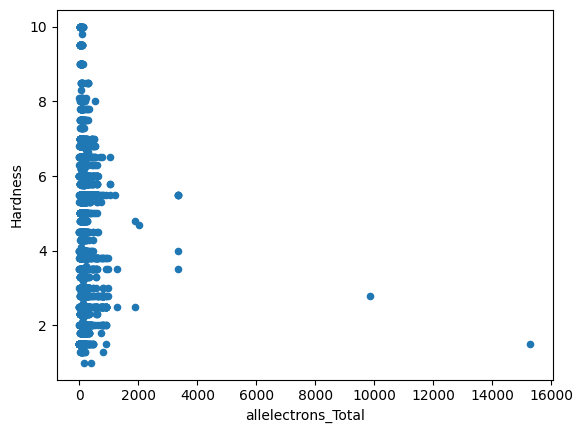

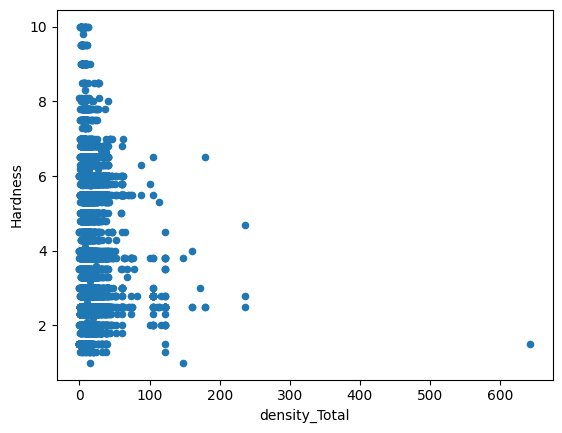

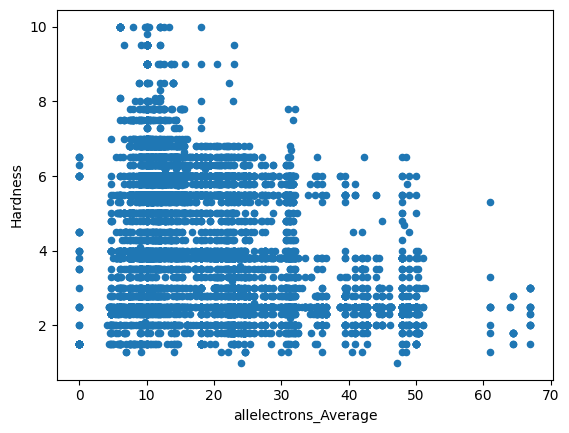

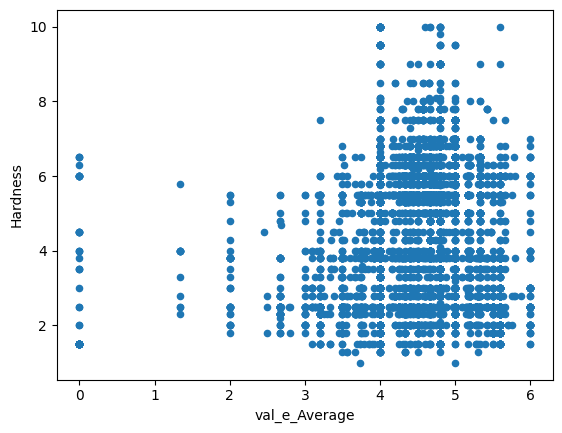

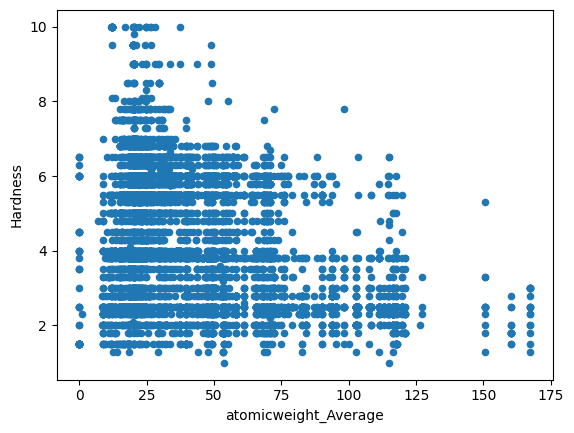

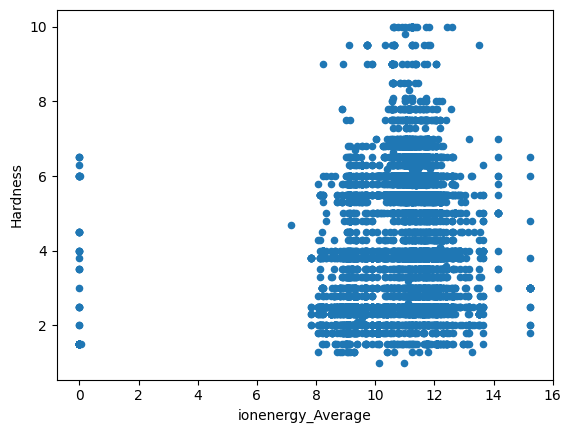

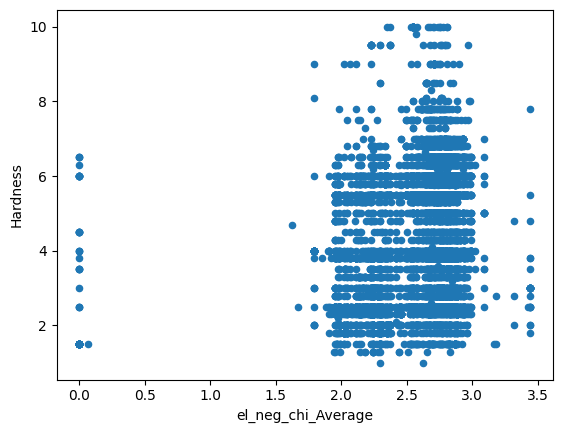

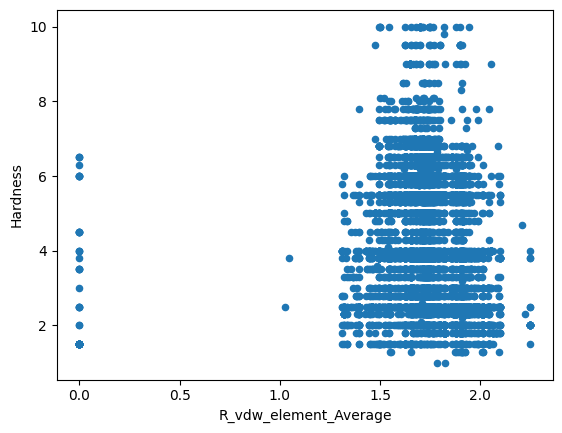

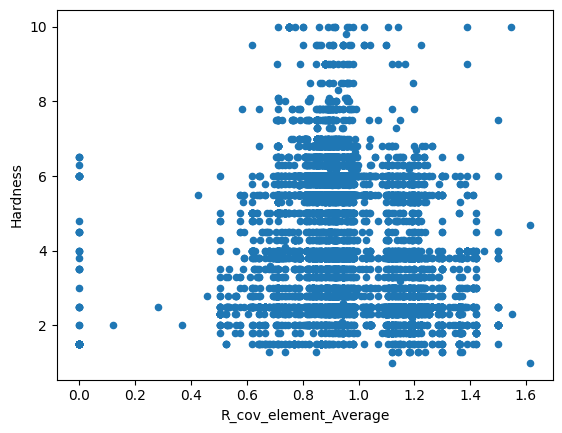

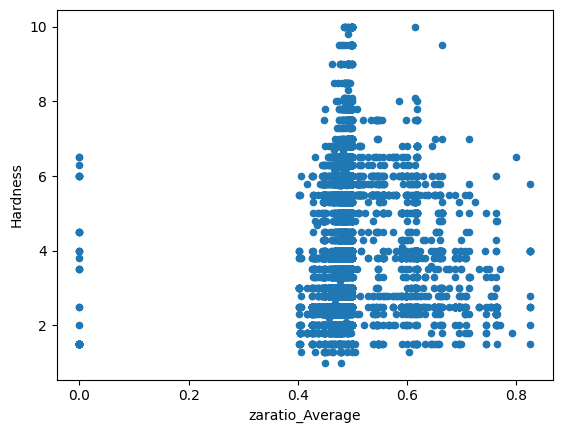

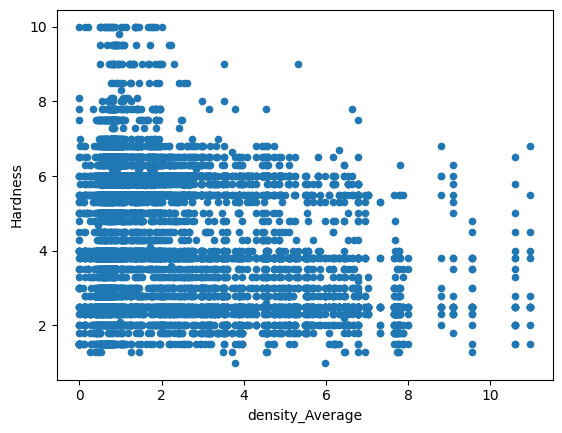

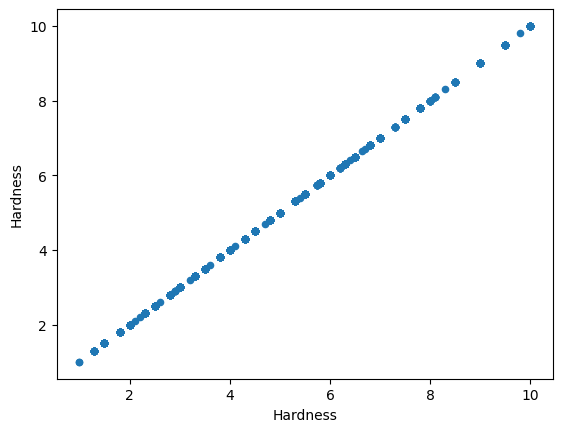

In [17]:
# 外れ値
%matplotlib inline

for name in df.columns:
    if name == "id" or name == "Hardneess":
        continue

    df.plot(kind = "scatter", x = name, y = "Hardness")

Index([774, 5493], dtype='int64')


<Axes: xlabel='allelectrons_Total', ylabel='Hardness'>

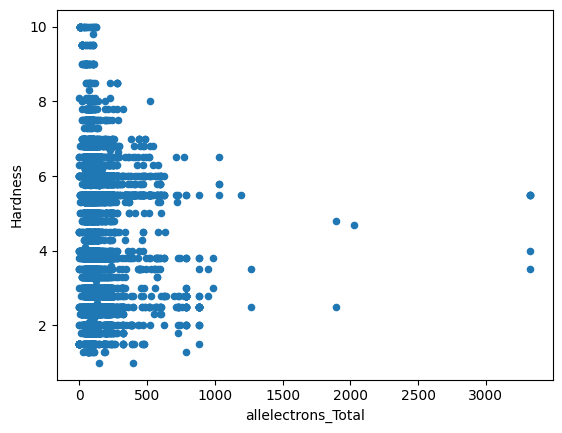

In [29]:
# allelectrons_Total 外れ値の削除
no = df[(df["Hardness"] < 4) & (df["allelectrons_Total"] > 8000)].index
print(no)
df2 = df.drop(no, axis = 0)
df2.plot(kind = "scatter", x = "allelectrons_Total", y = "Hardness")

Index([], dtype='int64')


<Axes: xlabel='density_Total', ylabel='allelectrons_Total'>

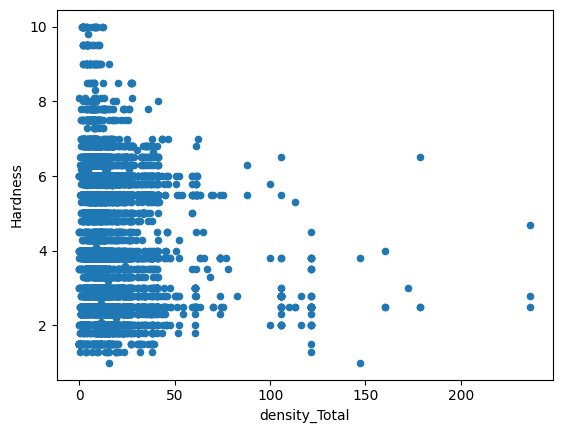

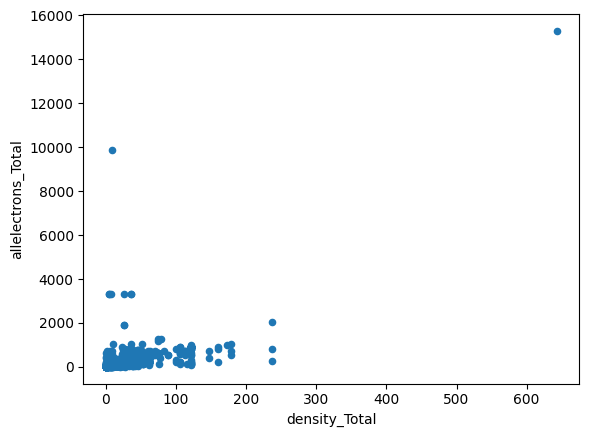

In [34]:
# allelectrons_Total 外れ値の削除
no2 = df2[(df2["Hardness"] < 2) & (df2["density_Total"] > 600)].index
print(no2)
df3 = df2.drop(no2, axis = 0)
df3.plot(kind = "scatter", x = "density_Total", y = "Hardness")
df.plot(kind = "scatter", x = "density_Total", y = "allelectrons_Total") # 2項目の外れ値は同じものだったらしい

In [40]:
x = df3.loc[:, "allelectrons_Total":"density_Average"]
x.head(2)
t = df3["Hardness"]
t.head(2)

0    6.0
1    6.5
Name: Hardness, dtype: float64

In [57]:
model = LinearRegression()
model.fit(x, t)
model.score(x, t)

0.2447765305855526

In [55]:
# 予測
testdf = pd.read_csv("input/test.csv")
testdf.head(2)
test = testdf.drop("id", axis = 1)
test.head(2)

res = model.predict(test)

output = pd.DataFrame({'id': testdf['id'], 'Hardness': res})

# CSVファイルとして出力
output.to_csv('submission.csv', index=False)